In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

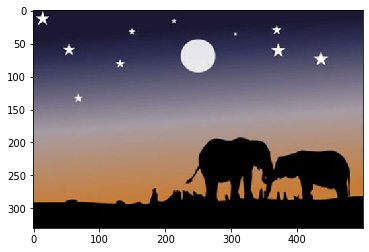

In [5]:
im=cv2.imread("elephant.jpg")
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)

In [50]:
original_pixels=im.shape
print(im.shape)

(330, 500, 3)


In [38]:
#Flattening each channel of image
pixel = im.reshape((330*500,3))
print(pixel.shape)

(165000, 3)


In [39]:
from sklearn.cluster import KMeans

In [66]:
dominant_color= 5
km= KMeans(n_clusters= dominant_color)
km.fit(pixel)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [67]:
centers = km.cluster_centers_
print(centers)

[[166.13551653 151.55277832 152.44252592]
 [ 37.93273001  35.19947366  64.38895752]
 [  1.49597475   0.83632573   1.15406   ]
 [188.32933141 133.22110979  85.75593925]
 [ 97.46305179  94.11765728 117.92314911]]


In [68]:
centers = np.array(centers, dtype='uint8')

In [69]:
print(centers)

[[166 151 152]
 [ 37  35  64]
 [  1   0   1]
 [188 133  85]
 [ 97  94 117]]


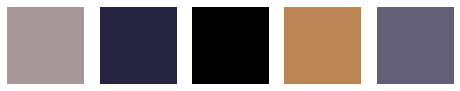

In [70]:
#Plotting these colors

i =1
plt.figure(0,figsize=(8,2))


color = []
for x in centers:
    plt.subplot(1,5,i)
    plt.axis("off")
    i+=1
    color.append(x)
    
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = x
    plt.imshow(a)
plt.show()

In [71]:
#Segmenting the original image
new_pixel= np.zeros(((330*500),3),dtype='uint8')

In [72]:
color

[array([166, 151, 152], dtype=uint8),
 array([37, 35, 64], dtype=uint8),
 array([1, 0, 1], dtype=uint8),
 array([188, 133,  85], dtype=uint8),
 array([ 97,  94, 117], dtype=uint8)]

In [73]:
km.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [74]:
for i in range(new_pixel.shape[0]):
    new_pixel[i]=color[km.labels_[i]]
new_pixel=new_pixel.reshape(original_pixels)

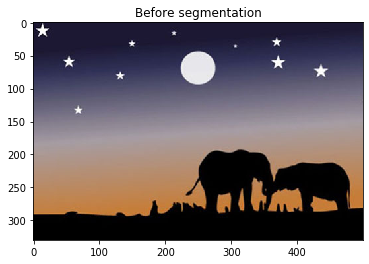

In [75]:
plt.imshow(im)
plt.title("Before segmentation")
plt.show()

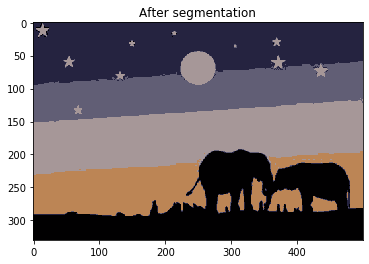

In [76]:
plt.imshow(new_pixel)
plt.title("After segmentation")
plt.show()